# **Decision Tree untuk Data Padi (Klasifikasi 3 Kelas Berdasarkan Produksi)**

**KELOMPOK 7 :** \
**Dede Masita (121450007)**  \
**Nadilla Andhara Putri (121450003)**  \

## Latar Belakang Masalah

Indonesia merupakan negara agraris yang menjadikan sektor pertanian menjadi sektor perekonomian nasional. Di antara berbagai komoditas pertanian, padi merupakan makanan pokok bagi sebagian besar penduduk Indonesia. Stabilitas dan optimalisasi produksi padi sangat menentukan tingkat ketahanan pangan nasional serta kesejahteraan para petani.

Pulau Sumatera sebagai salah satu wilayah dengan potensi lahan pertanian yang luas memiliki kontribusi terhadap produksi padi nasional. Namun, produksi padi di tiap provinsi di Sumatera tidak selalu menunjukkan tren yang stabil karena dipengaruhi oleh berbagai faktor, seperti kondisi iklim, kualitas lahan, teknologi pertanian, dan kebijakan pemerintah daerah.

Klasifikasi hasil produksi padi menjadi penting untuk memahami sejauh mana produktivitas setiap wilayah. Klasifikasi ini dapat digunakan sebagai dasar untuk perencanaan kebijakan, distribusi sumber daya, serta evaluasi efektivitas program pertanian.

Penelitian ini menggunakan algoritma *Decision Tree*, untuk mengelompokkan hasil produksi padi ke dalam tiga kategori:
- **Tinggi**: Produksi sangat tinggi  
- **Sedang**: Produksi sedang  
- **Rendah**: Produksi rendah

Dataset yang dianalisis mencakup data produksi padi dari berbagai provinsi di Sumatera selama periode 1993–2020, dengan total 225 observasi. Dengan menerapkan algoritma *Decision Tree*, analisis ini bertujuan untuk membangun model klasifikasi yang tidak hanya akurat, tetapi juga mudah diinterpretasikan.

#Persiapan Data

In [1]:
# 1. Import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 2. Membaca dan eksplorasi data
data = pd.read_csv('Padi.csv')
data.head()

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.0,323589.0,1627.0,82.00,26.06
1,Aceh,1994,1299699.0,329041.0,1521.0,82.12,26.92
2,Aceh,1995,1382905.0,339253.0,1476.0,82.72,26.27
3,Aceh,1996,1419128.0,348223.0,1557.0,83.00,26.08
4,Aceh,1997,1368074.0,337561.0,1339.0,82.46,26.31


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        224 non-null    object 
 1   Tahun           224 non-null    int64  
 2   Produksi        224 non-null    float64
 3   Luas Panen      224 non-null    float64
 4   Curah hujan     224 non-null    float64
 5   Kelembapan      224 non-null    float64
 6   Suhu rata-rata  224 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 12.4+ KB


In [4]:
# 3. Cek nilai null dan tipe data
data.isnull().sum()

,0
Provinsi,0
Tahun,0
Produksi,0
Luas Panen,0
Curah hujan,0
Kelembapan,0
Suhu rata-rata,0


In [5]:
# 4. Encoding kolom kategorikal (fitur)
data_encoded = data.copy()
label_encoders = {}

for col in data_encoded.select_dtypes(include=['object']).columns:
    if col != 'Produksi':
        le = LabelEncoder()
        data_encoded[col] = le.fit_transform(data_encoded[col])
        label_encoders[col] = le

#Pemilihan Data

In [6]:

# Buat kolom kelas_produksi
def klasifikasi(produksi):
    if produksi < 100000:
        return 'Rendah'
    elif produksi < 500000:
        return 'Sedang'
    else:
        return 'Tinggi'

data['kelas_produksi'] = data['Produksi'].apply(klasifikasi)


In [7]:
# Pisahkan fitur dan target
X = data.drop(columns=['Provinsi', 'kelas_produksi', 'Produksi'])  # Produksi tidak boleh ikut fitur karena diprediksi
y = data['kelas_produksi']


In [8]:
# 6. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Pembuatan Model

In [9]:
# 7. Melatih model Decision Tree
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [10]:
# Simpan model dan metadata
import joblib
joblib.dump(model, 'model_padi_dt.pkl')
joblib.dump(data[['Provinsi', 'Tahun']], 'provinsi_tahun.pkl')

['provinsi_tahun.pkl']

In [11]:
y_pred = model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9777777777777777


#VISUALISASI

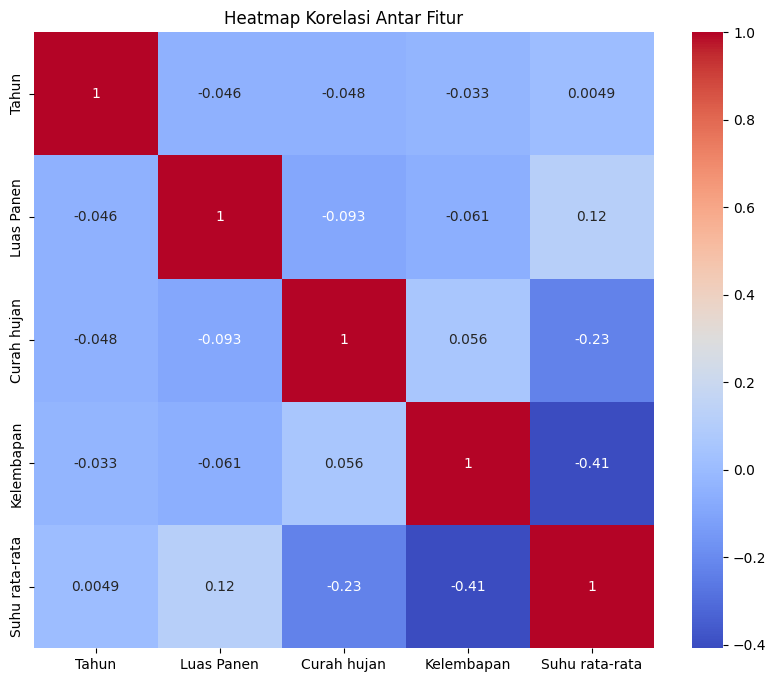

In [12]:
# 8. Evaluasi model

plt.figure(figsize=(10, 8))
sns.heatmap(data.drop(columns=['Provinsi', 'kelas_produksi', 'Produksi']).corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()



In [13]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

      Rendah       0.00      0.00      0.00         1
      Sedang       0.89      1.00      0.94         8
      Tinggi       1.00      1.00      1.00        36

    accuracy                           0.98        45
   macro avg       0.63      0.67      0.65        45
weighted avg       0.96      0.98      0.97        45



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


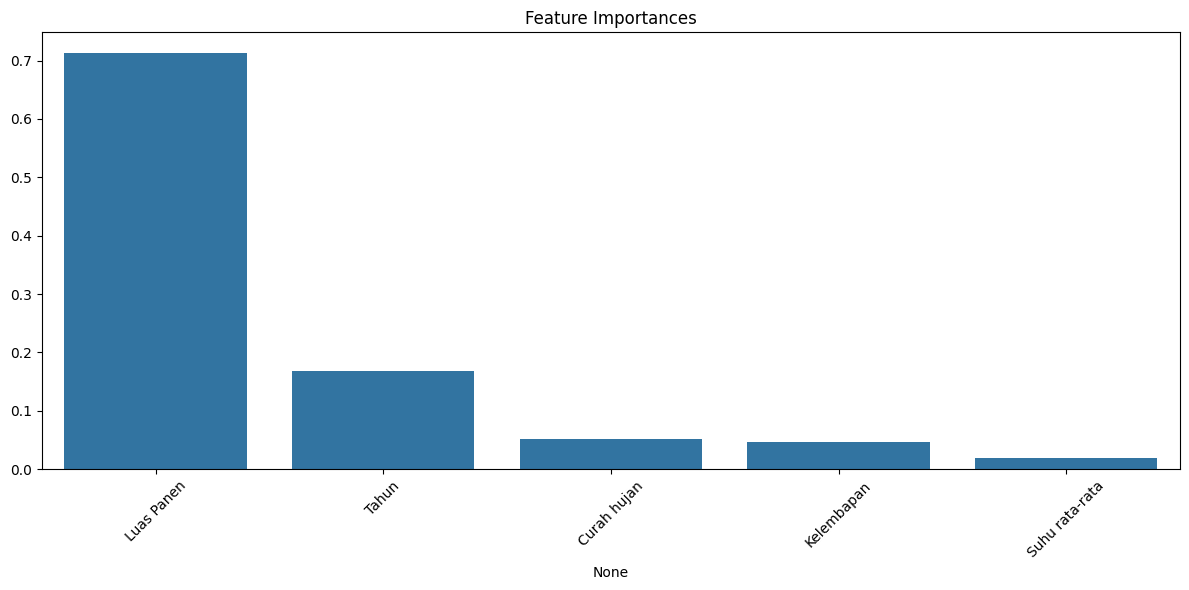

In [14]:
import numpy as np

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
sns.barplot(x=X.columns[indices], y=importances[indices])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


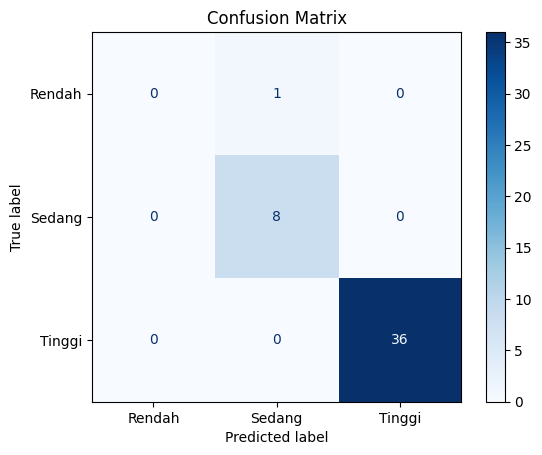

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


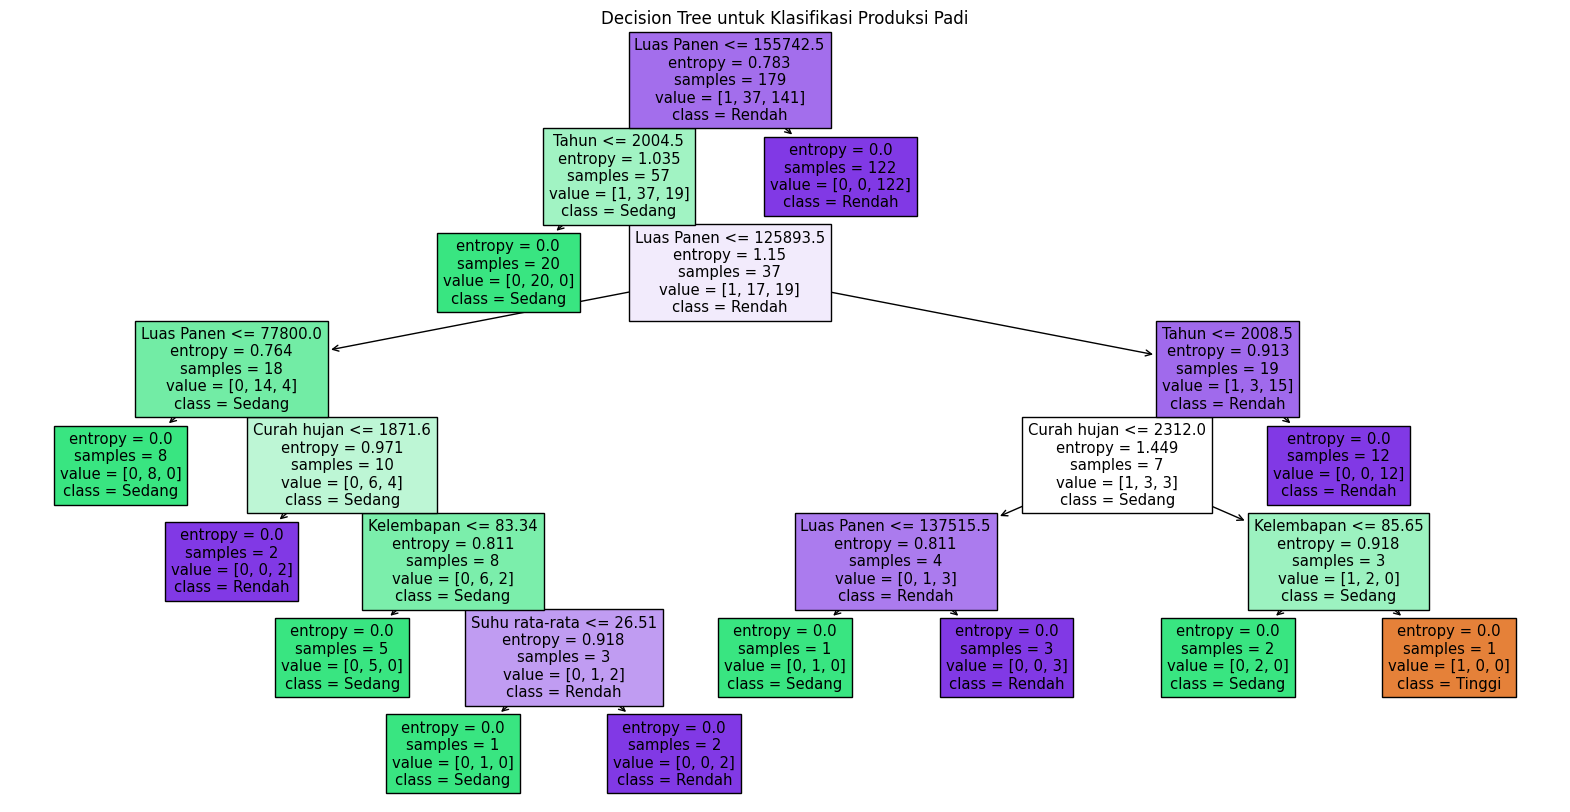

In [16]:
# 9. Visualisasi pohon keputusan
plt.figure(figsize=(20,10))
class_names = y.unique().tolist()
plot_tree(model, filled=True, feature_names=X.columns, class_names=class_names)
plt.title("Decision Tree untuk Klasifikasi Produksi Padi")
plt.show()